## 1. Generowanie procesów punktowych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set() 
sns.set_theme(style="whitegrid")

### Proces regularny z komponentem losowym w obrębie prostokątnego obszaru

Funkcja `regular_on_rectangle()`, generuje proces regularny z komponentem losowym w obrębie prostokątnego obszaru.

Algorytm postępowania:
1) Wygenerowanie punktów na regularnej siatce tak, że poszczególne punkty są oddalone od siebie o odległość $d_x$ w poziomie i $d_y$ w pionie, a skrajne punkty są oddalone od krawędzi obszaru odpowiednio o $\frac{1}{2} d_x$ w poziomie i $\frac{1}{2}d_y$ w pionie.
2) Dodanie do współrzędnych każdego z punktów komponentu losowego określony wzorem $r \cdot rand$ , gdzie $r$ to parametr określający wielkość komponentu losowego, a $rand$ to wartość wylosowana z rozkładu jednostajnego na przedziale $[-\frac{1}{2} d_x, \frac{1}{2} d_x]$ w przypadku współrzędnej $x$ i na przedziale $[-\frac{1}{2} d_y, \frac{1}{2} d_y]$ w przypadku współrzędnej $y$.

Parametry przykładowego rozkładu:
 - liczba punktów w poziomie: 20
 - liczba punktów w pionie: 10
 - wartość współczynnika określającego siłę komponentu losowego: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10


#### a) Przygotowanie funkcji

In [2]:
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    
    dx = (x_lim[1] - x_lim[0])/grid[0]
    dy = (y_lim[1] - y_lim[0])/grid[1]

    
    x = np.linspace((x_lim[0]+1/2*dx),(x_lim[1]-1/2*dx),grid[0])
    y = np.linspace((y_lim[0]+1/2*dy),(y_lim[1]-1/2*dy),grid[1])
    
    
    xx,yy = np.meshgrid(x,y)


    rand_xx = np.random.uniform(-1/2*dx,1/2*dx,size = (grid[1],grid[0]))*random_component
    rand_yy = np.random.uniform(-1/2*dy,1/2*dy,size = (grid[1],grid[0]))*random_component


    xx += rand_xx
    yy += rand_yy
    
    
    xx = xx.flatten()
    yy = yy.flatten()


    df_R = pd.DataFrame(data = {"X": xx,"Y": yy})
    
    return(df_R)

#### b) Wygenerowanie procesu

In [3]:
df_R = regular_on_rectangle((20,10),0.5,(0,20),(0,10))

#### c) Wizualizacja

(0.0, 10.0)

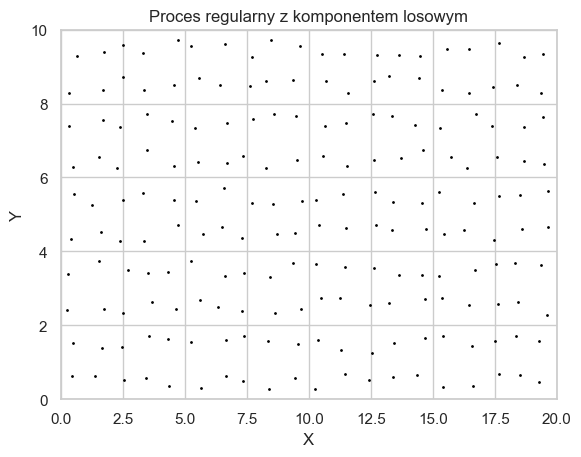

In [4]:
ax1 = df_R.plot.scatter(x='X',y='Y', c = 'Black',s=1)
plt.title("Proces regularny z komponentem losowym")
ax1.set_xlim(0,20)
ax1.set_ylim(0,10)

### Jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru

Funkcja `homogeneous_poisson_on_rectangle()`, generuje jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.

Algorytm postępowania:
1. Wylosowanie liczby punktów $n$ z rozkładu Poissona o wartości oczekiwanej równej $i \cdot a$, gdzie $i$ to intensywność procesu, a $a$ jest powierzchnią obszaru, na którym generujemy punkty.
2. Wylosowanie niezależnych od siebie wartości współrzędnych $n$ punktów z rozkładów jednostajnych na przedziałach określonych przez przyjęte zakresy wartości współrzędnych $x$ i $y$.

Parametry przykładowego rozkładu:
 - intensywność procesu: 10
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [5]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    
    ExpValue = intensity*((x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0]))
    n = np.random.poisson(ExpValue)
    x = np.random.uniform(x_lim[0], x_lim[1], n)
    y = np.random.uniform(y_lim[0], y_lim[1], n)
    
    x = x.flatten()
    y = y.flatten()
    df_HP = pd.DataFrame(data = {"X": x,"Y": y})
    return df_HP

#### b) Wygenerowanie procesu

In [6]:
df_HP = homogeneous_poisson_on_rectangle(10, [0,20], [0,10])

#### c) Wizualizacja

(0.0, 10.0)

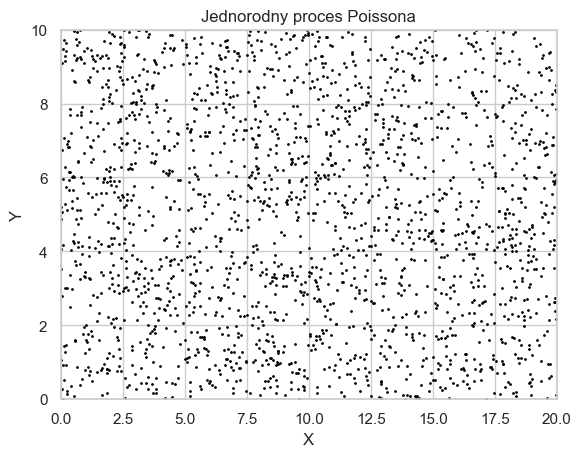

In [7]:
ax2 = df_HP.plot.scatter(x='X',y='Y', c = 'Black', s=1)
plt.title("Jednorodny proces Poissona")
ax2.set_xlim(0,20)
ax2.set_ylim(0,10)

### Niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru

Funkcja `unhomogeneous_poisson_on_rectangle()`, generuje niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.

Algorytm postępowania:
1. Wygenerowanie punktów z wykorzystaniem jednorodnego procesu Poissona przyjmując intensywność procesu równą maksymalnej wartości jaką osiąga funkcja intensywności w analizowanym obszarze.
2. Przerzedzenie rozkładu poprzez usunięcie z niego punktów z prawdopodobieństwem równym $1-\frac{i}{i_{max}}$, gdzie $i$ to wartość jaką przyjmuje funkcja intensywności dla współrzędnych danego punktu, a $i_{max}$ to maksymalna wartość jaką funkcja intensywności osiąga w granicach analizowanego obszaru.

Parametry przykładowego rozkładu:
 - intensywność procesu: f(x, y) = x
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [8]:
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]


   Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    
    Intensity = max([max(x_lim), max(y_lim)])
    ExpValue = Intensity*((x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0]))
    
    n = np.random.poisson(ExpValue)
    
    x = np.random.uniform(x_lim[0], x_lim[1], n)
    y = np.random.uniform(y_lim[0], y_lim[1], n)  
    x = x.flatten()
    y = y.flatten()
    
    xx = []
    yy = []
    
    for i in range(len(x)):
        if(random.uniform(0, 1) > (1-intensity_function(x[i], y[i])/Intensity)):
            xx.append(x[i])
            yy.append(y[i])

    
    df_UP = pd.DataFrame(data = {"X": xx,"Y": yy})

    return df_UP

#### b) Wygenerowanie procesu

In [9]:
def intensity_function(x, y): 
    Intensity = x
    return Intensity

df_UP = unhomogeneous_poisson_on_rectangle(intensity_function, [0,40], [0,10])

#### c) Wizualizacja

(0.0, 10.0)

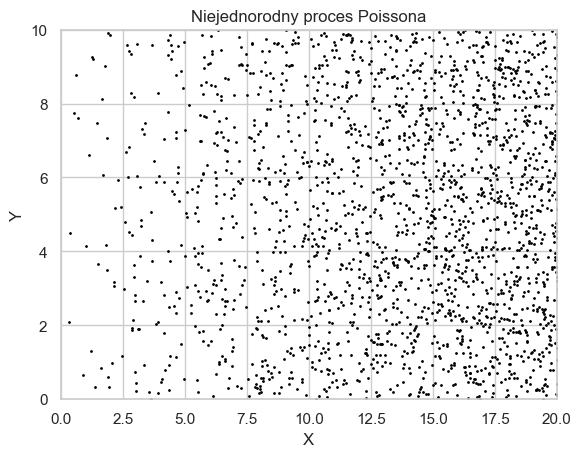

In [10]:
ax3 = df_UP.plot.scatter(x='X',y='Y', c = 'Black', s=1)
plt.title("Niejednorodny proces Poissona")
ax3.set_xlim(0,20)
ax3.set_ylim(0,10)

### Proces punktowy Matérna w obrębie prostokątnego obszaru

Funkcja `materna_on_rectangle()`, generuje proces punktowy Materna w obrębie prostokątnego obszaru.

Algorytm postępowania:
1. Rozszerzenie analizowanego obszaru o bufor równy wartości parametru `cluster_radius`.
2. W obrębie rozszerzonego obszaru wygenerowanie punktów w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Wokół każdego z wygenerowanych punktów (okrąg o promieniu równym wartości parametru `cluster_radius`) wygenerowanie punktów z wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `daughter_intensity`.
4. Usunięcie z rozkładu wszystkich punktów leżących poza analizowanym (nierozszerzonym) obszarem.

Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - intensywność procesu potomnego: 10
 - promień klastra: 1
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [11]:
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """

    xLimMinExt = x_lim[0] - cluster_radius
    xLimMaxExt = x_lim[1] + cluster_radius
    yLimMinExt = y_lim[0] - cluster_radius
    yLimMaxExt = y_lim[1] + cluster_radius
    
    
    areaTotalExt = (xLimMaxExt - xLimMinExt) * (yLimMaxExt - yLimMinExt)  

    numbPointsParent = np.random.poisson(areaTotalExt * parent_intensity)  

    
    xxParent = xLimMinExt + (xLimMaxExt - xLimMinExt) * np.random.uniform(0, 1, numbPointsParent)
    yyParent = yLimMinExt + (yLimMaxExt - yLimMinExt) * np.random.uniform(0, 1, numbPointsParent)

    numbPointsDaughter = np.random.poisson(daughter_intensity, numbPointsParent)
    numbPoints = sum(numbPointsDaughter)  


    theta = 2 * np.pi * np.random.uniform(0, 1, numbPoints)  
    gamma = cluster_radius * np.sqrt(np.random.uniform(0, 1, numbPoints))  
    
    xx0 = theta * np.cos(theta)
    yy0 = gamma * np.sin(gamma) 
    
    
    xx = np.repeat(xxParent, numbPointsDaughter)
    yy = np.repeat(yyParent, numbPointsDaughter)

    xx = xx + xx0
    yy = yy + yy0

    
    trimed = ((xx >= x_lim[0]) & (xx <= x_lim[1]) & (yy >= y_lim[0]) & (yy <= y_lim[1]))
    xx = xx[trimed]
    yy = yy[trimed]

    
    df_M = pd.DataFrame(data = {"X": xx,"Y": yy})
    
    return df_M  

#### b) Wygenerowanie procesu

In [12]:
df_M = materna_on_rectangle(0.2, 10, 1, [0,20], [0,10])

#### c) Wizualizacja

(0.0, 10.0)

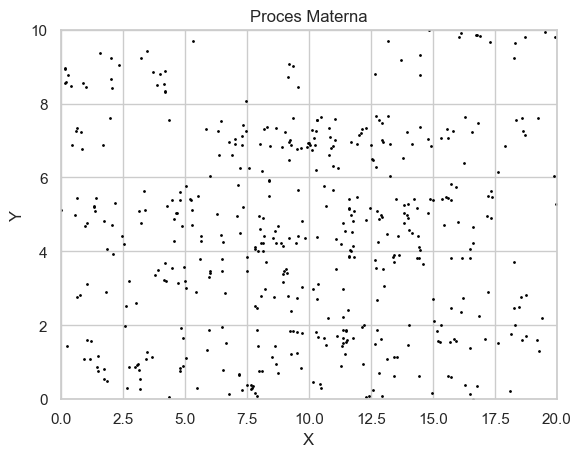

In [13]:
ax4 = df_M.plot.scatter(x= 'X', y='Y', c="Black",s=1);
plt.title("Proces Materna")
ax4.set_xlim(0,20)
ax4.set_ylim(0,10)

### Proces punktowy Thomasa w obrębie prostokątnego obszaru

Funkcja `thomas_on_rectangle()`, generuje proces punktowy Thomasa w obrębie prostokątnego obszaru.

Algorytm postępowania:
1. Rozszerzenie analizowanego obszaru o bufor, którego wielkość jest zależna od wartości parametru `cluster_sigma` (przyjęto 4-krotność wartości tego parametru).
2. W obrębie rozszerzonego obszaru wygenerowanie punktów z wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Dla każdego z wygenerowanych punktów (centrów klastrów):
    - Wylosowanie liczby punktów znajdujących się w obrębie danego klastra $n_c$ z rozkładu Poissona o wartości oczekiwanej równej wartości parametru `mean_cluster_size`.
    - Wylosowanie niezależnie od siebie wartości współrzędnych $n_c$ punktów z rozkładów normalnych o wartości oczekiwanej równej współrzędnej punktu stanowiącego centrum klastra i odchyleniu standardowym równym wartości parametru `cluster_sigma`.
4. Usunięcie z rozkładu wszystkich punktów leżących poza analizowanym (nierozszerzonym) obszarem.

Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - średnia liczebność klastra: 30
 - odchylenie standardowe klastra: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [14]:
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """

    rExt=4*cluster_sigma
    
    xMinExt = x_lim[0] - rExt
    xMaxExt = x_lim[1] + rExt
    yMinExt = y_lim[0] - rExt
    yMaxExt = y_lim[1] + rExt

    areaTotalExt = (xMaxExt - xMinExt) * (yMaxExt - yMinExt)  


    numbPointsParent = np.random.poisson(areaTotalExt * parent_intensity)
    
    xxParent = xMinExt + (xMaxExt - xMinExt) * np.random.uniform(0, 1, numbPointsParent)
    yyParent = yMinExt + (yMaxExt - yMinExt)  * np.random.uniform(0, 1, numbPointsParent)

    numbPointsDaughter = np.random.poisson(mean_cluster_size, numbPointsParent)
    numbPoints = sum(numbPointsDaughter) 


    xx0 = np.random.normal(0, cluster_sigma, numbPoints)
    yy0 = np.random.normal(0, cluster_sigma, numbPoints) 

    
    xx = np.repeat(xxParent, numbPointsDaughter)
    yy = np.repeat(yyParent, numbPointsDaughter)

    
    xx = xx + xx0
    yy = yy + yy0

    
    trimed = ((xx >= x_lim[0]) & (xx <= x_lim[1]) & (yy >= y_lim[0]) & (yy <= y_lim[1]))
    xx = xx[trimed] 
    yy = yy[trimed]

    
    df_T = pd.DataFrame(data = {'X':xx,'Y':yy})

    return(df_T)


#### b) Wygenerowanie procesu

In [15]:
df_T = thomas_on_rectangle(0.2, 30, 0.5, [0,20], [0,10])

#### c) Wizualizacja

(0.0, 10.0)

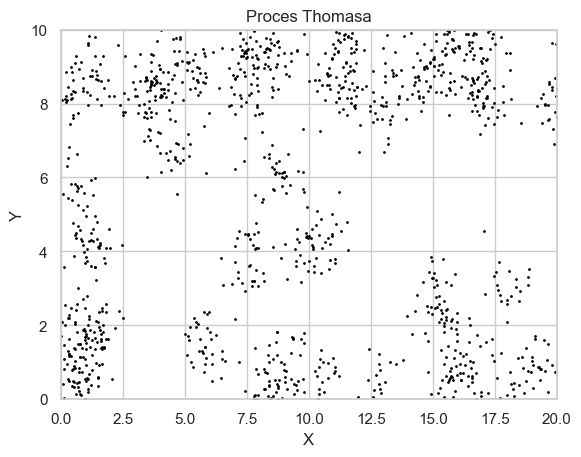

In [16]:
ax5 = df_T.plot.scatter(x= 'X', y='Y', c="Black",s=1)
plt.title("Proces Thomasa")
ax5.set_xlim(0,20)
ax5.set_ylim(0,10)